# Sentiment Analysis on IMDB Movie Reviews
### A Comparative Study of Machine Learning and Deep Learning Models

---

## **Author**: Mahesh Mynam 
## **Date**: 11/24/2024

---

### **Objective**:
The purpose of this project is to perform sentiment analysis on movie reviews using the IMDB dataset. This involves:
- Preprocessing textual data to prepare it for analysis.
- Comparing the performance of machine learning models such as Logistic Regression, Decision Trees, and Random Forest.
- Exploring deep learning models like LSTM and Bidirectional LSTM for sentiment classification.
- Evaluating models using metrics such as accuracy, precision, recall, F1-score, and confusion matrices.
- Laying the groundwork for future improvements using transformer-based models like BERT.

---

### **Dataset Overview**:
- **Source**: [IMDB Dataset of 50K Movie Reviews on Kaggle](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)
- **Size**: 50,000 movie reviews (balanced dataset with 25,000 positive and 25,000 negative reviews).
- **Format**: CSV file with two columns: `review` (text) and `sentiment` (label: "positive" or "negative").

---

### **Notebook Index**

1. **Introduction**  
   - Importance of sentiment analysis in understanding user opinions.  
   - Relevance of sentiment analysis in the movie industry.  

2. **Dataset Overview**  
   - Description of the IMDB dataset and its key variables.  
   - Dataset source and relevance for sentiment classification.  

3. **Exploratory Data Analysis (EDA)**  
   - Distribution of positive and negative sentiments.  
   - Analysis of review lengths (words and characters).  
   - Visualizing sentiment-based text lengths and their patterns.  
   - Word cloud representation for common words in positive and negative reviews.

4. **Data Preprocessing**  
   - Text cleaning: Removing HTML tags, special characters, and stopwords.  
   - Tokenization and padding for deep learning models.  
   - TF-IDF vectorization for machine learning models.  
   - Splitting the dataset into training, validation, and test sets.  

5. **Model Implementation**  
   - **Machine Learning Models**:
     - Logistic Regression with hyperparameter tuning.
     - Decision Tree with Grid Search optimization.
     - Random Forest with hyperparameter tuning.  
   - **Deep Learning Models**:
     - LSTM for sequential data processing.
     - Bidirectional LSTM for bidirectional context understanding.

6. **Evaluation**  
   - Performance comparison of all models using metrics such as accuracy, precision, recall, F1-score, and confusion matrices.  
   - Visualization of model accuracies.

7. **Testing with Sample Input**  
   - Testing models with a sample input sentence: *"The plot of the movie is great"*.  
   - Observing and comparing predictions across all models.

8. **Conclusions and Future Work**  
   - Summary of findings from the model evaluations.  
   - Discussion on limitations, such as dataset size and lack of domain-specific nuances.  
   - Suggestions for future improvements, including the use of transformer-based models like BERT.


---

### **How to Use This Notebook**:
1. Ensure all required libraries are installed (listed in the "Requirements" section below).
2. Download the IMDB dataset from the Kaggle link provided and place it in the appropriate directory.
3. Run each cell sequentially for preprocessing, modeling, and evaluation.

---

### **Requirements**:
Install the following Python libraries before running the notebook:  
- `pandas`, `numpy`, `matplotlib`, `seaborn` (for data handling and visualization).  
- `sklearn` (for machine learning models and evaluation metrics).  
- `tensorflow`, `keras` (for deep learning models like LSTM and BiLSTM).  
- `nltk` (for text preprocessing and stopword removal).  

---



## **Step 1: Importing Libraries**
This section imports all the necessary Python libraries required for data preprocessing, visualization, machine learning, and deep learning tasks.  

### **Purpose of Libraries**:
- **Data Manipulation**: Libraries like `pandas` and `numpy` are used for handling and processing structured data.
- **Data Visualization**: `matplotlib` and `seaborn` help create meaningful plots to explore the dataset.
- **Text Preprocessing**: Tools like `nltk` and `re` are used to clean and prepare text for modeling.
- **Machine Learning**: Models such as Logistic Regression, Decision Trees, and Random Forest are implemented using `sklearn`.
- **Deep Learning**: TensorFlow and Keras are used to implement LSTM and Bidirectional LSTM for sentiment analysis.
  
### **Setup Instructions**:
Make sure to install the following libraries in your Python environment before running the notebook.


In [24]:
# Importing Required Libraries
# --------------------------------------

# For data manipulation and analysis
import pandas as pd  # For handling structured data
import numpy as np   # For numerical operations

# For data visualization
import matplotlib.pyplot as plt  # For creating plots
import seaborn as sns            # For enhanced visualizations

# For text preprocessing
import re                        # For regular expression operations
import nltk                      # For natural language processing tasks
from nltk.corpus import stopwords  # For removing common stop words

# For machine learning models
from sklearn.model_selection import train_test_split  # For splitting the dataset
from sklearn.feature_extraction.text import TfidfVectorizer  # For converting text into numerical format
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.tree import DecisionTreeClassifier      # Decision Tree model
from sklearn.ensemble import RandomForestClassifier  # Random Forest model
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix  # For evaluation metrics
from sklearn.model_selection import GridSearchCV     # For hyperparameter tuning

# For deep learning models
from tensorflow.keras.models import Sequential  # For creating deep learning models
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional  # LSTM layers
from tensorflow.keras.preprocessing.text import Tokenizer  # For tokenizing text
from tensorflow.keras.preprocessing.sequence import pad_sequences  # For padding sequences
from tensorflow.keras.optimizers import Adam  # Optimizer
from tensorflow.keras.callbacks import EarlyStopping  # To prevent overfitting
from tensorflow.keras.regularizers import l2  # For regularization

# Initialize NLTK resources
nltk.download('stopwords')  # Download stopwords for text preprocessing

## **Step 2: Loading the Dataset**
In this step, we will load the IMDB dataset containing 50,000 movie reviews. This dataset is sourced from [Kaggle](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews).  

### **Dataset Description**:
- **Columns**:  
  - `review`: The text of the movie review.  
  - `sentiment`: The label indicating whether the review is positive or negative.  
- **Data Size**: 50,000 rows, evenly split between positive and negative reviews.

### **Objective**:
- Load the dataset into a Pandas DataFrame.
- Inspect the dataset structure to ensure proper loading and understand its contents.

### **Steps**:
1. Load the CSV file using `pandas.read_csv()`.
2. Display basic information about the dataset using `.info()` and `.head()`.
3. Check for missing values and duplicate entries.


In [37]:
# Load Dataset
data = pd.read_csv('/Users/mahesh/Downloads/IMDB Dataset.csv')

# Display Basic Information
print(data.info())
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [39]:
print(data.isnull().sum())

review       0
sentiment    0
dtype: int64


## **Step 3: Exploratory Data Analysis (EDA)**
Before preprocessing the dataset, it’s important to analyze its structure and key characteristics. This section focuses on understanding the dataset through:
1. **Distribution of Sentiments**: Visualizing the balance of positive and negative reviews.
2. **Text Length Analysis**: Examining the length of reviews in terms of words and characters.
3. **Input Length Distribution**: Comparing review lengths across sentiments.
4. **Sentiment-Based Text Analysis**: Exploring average text length and word frequencies for each sentiment.
5. **Balanced Dataset Analysis**: Verifying whether the dataset is balanced in terms of sentiment distribution.

These insights will guide preprocessing and modeling decisions.


1. **Distribution of Sentiments**

Here it is evid that the dataset is balanced dataset with equal number of data points in wach class label.

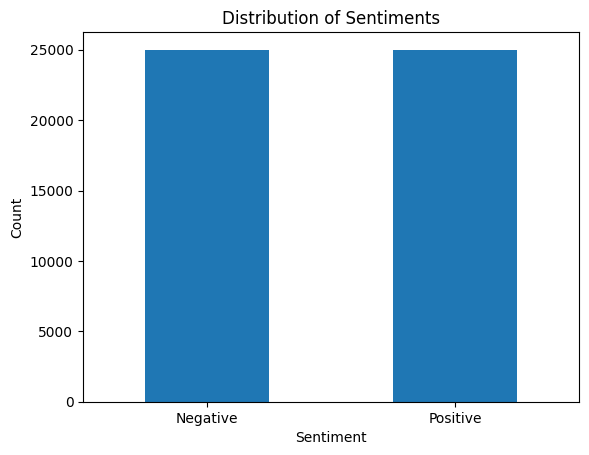

In [46]:
# Distribution of sentiment classes
import matplotlib.pyplot as plt

data['sentiment'].value_counts().plot(kind='bar')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'], rotation=0)
plt.show()


2. **Text Length Analysis**

Examining the length of reviews in terms of words and characters.

This helps in understanding what to do when considering the number of words in word embeddings.

       text_length_words  text_length_chars
count        50000.00000       50000.000000
mean           118.14052         814.021020
std             89.40451         631.218449
min              3.00000          17.000000
25%             63.00000         425.000000
50%             88.00000         598.000000
75%            144.00000         990.000000
max           1416.00000        9155.000000


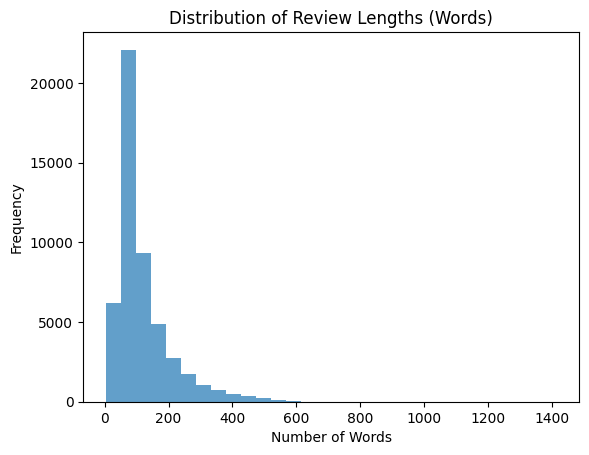

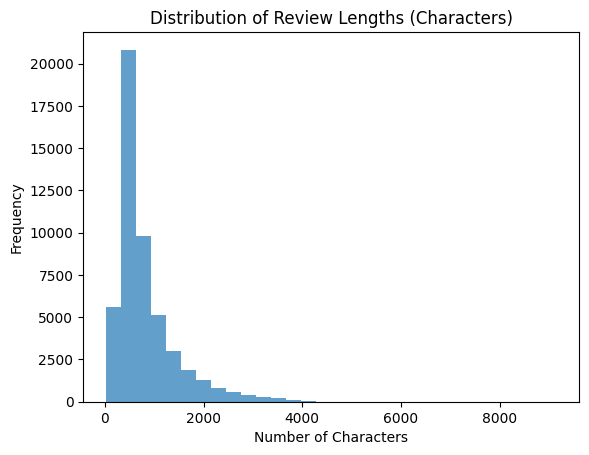

In [41]:
# Add text length columns
data['text_length_words'] = data['review'].apply(lambda x: len(x.split()))
data['text_length_chars'] = data['review'].apply(len)

# Display statistics
print(data[['text_length_words', 'text_length_chars']].describe())

# Visualize text length distribution
data['text_length_words'].plot(kind='hist', bins=30, alpha=0.7)
plt.title('Distribution of Review Lengths (Words)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

data['text_length_chars'].plot(kind='hist', bins=30, alpha=0.7)
plt.title('Distribution of Review Lengths (Characters)')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()


3. **Input Length Distribution**

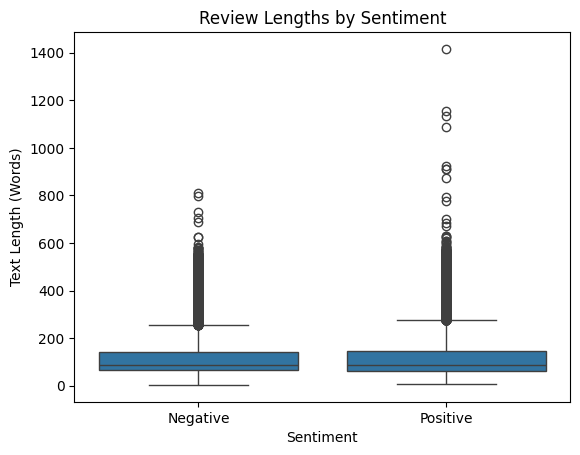

In [42]:
# Boxplot to compare text lengths for each sentiment
import seaborn as sns

sns.boxplot(x='sentiment', y='text_length_words', data=data)
plt.title('Review Lengths by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Text Length (Words)')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'])
plt.show()


4. **Sentiment-Based Text Analysis**: 

Exploring average text length and word frequencies for each sentiment.

This helps in understanding the words that are repeated frequently in each class lable and can see how it impacts the sentiments.

In [47]:
# Average text length for each sentiment
avg_length_by_sentiment = data.groupby('sentiment')['text_length_words'].mean()
print(avg_length_by_sentiment)

# Sentiment word frequency
from collections import Counter

positive_words = Counter(' '.join(data[data['sentiment'] == 1]['review']).split())
negative_words = Counter(' '.join(data[data['sentiment'] == 0]['review']).split())

print('Most Common Positive Words:', positive_words.most_common(10))
print('Most Common Negative Words:', negative_words.most_common(10))


sentiment
0    116.34208
1    119.93896
Name: text_length_words, dtype: float64
Most Common Positive Words: [('film', 42095), ('movie', 37846), ('one', 27312), ('like', 17709), ('good', 15020), ('great', 12961), ('story', 12932), ('time', 12746), ('well', 12724), ('see', 12271)]
Most Common Negative Words: [('movie', 50091), ('film', 37581), ('one', 26273), ('like', 22451), ('even', 15243), ('good', 14717), ('bad', 14714), ('would', 14005), ('really', 12354), ('time', 12353)]


5. **Balanced Dataset Analysis**: 

Verifying whether the dataset is balanced in terms of sentiment distribution.

sentiment
1    0.5
0    0.5
Name: proportion, dtype: float64


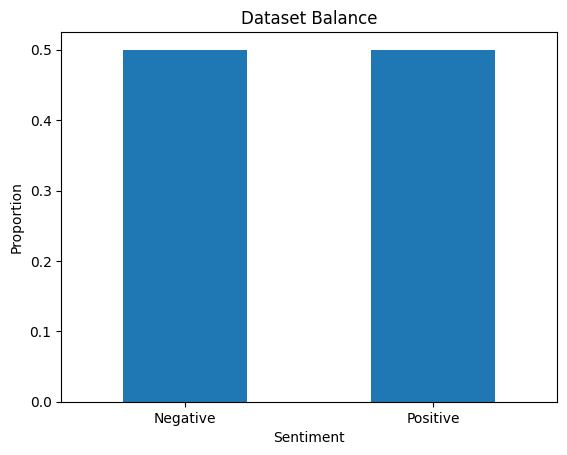

In [44]:
# Check balance
print(data['sentiment'].value_counts(normalize=True))

# Bar chart for dataset balance
data['sentiment'].value_counts(normalize=True).plot(kind='bar')
plt.title('Dataset Balance')
plt.xlabel('Sentiment')
plt.ylabel('Proportion')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'], rotation=0)
plt.show()


## **Step 4: Data Preprocessing**
In this step, the dataset is prepared for machine learning and deep learning models. The preprocessing tasks include:

1. **Text Cleaning**:
   - Removing HTML tags, special characters, and numbers.
   - Converting all text to lowercase for consistency.
   - Removing stop words to focus on meaningful words.

2. **Sentiment Encoding**:
   - Converting sentiment labels into numerical format: `positive` to `1` and `negative` to `0`.

3. **Splitting the Dataset**:
   - Dividing the data into training, validation, and test sets to ensure proper evaluation of the models.

4. **Text Vectorization**:
   - Applying TF-IDF vectorization to convert text data into numerical form for machine learning models.
   - Limiting the maximum features to 4,000 for better representation without overfitting.

This process ensures that the dataset is clean, numerical, and ready for modeling.


In [38]:
# Define Stop Words
#stop words can be eliminated because it doesn't have much impact on the model we build. 
stop_words = set(stopwords.words('english'))

# Function to Clean Text
def clean_text(text):
    text = re.sub('<.*?>', '', text)  # Remove HTML tags
    text = re.sub('[^a-zA-Z]', ' ', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    text = ' '.join(word for word in text.split() if word not in stop_words)  # Remove stopwords
    return text

# Apply Cleaning Function
data['review'] = data['review'].apply(clean_text)

# Encode Sentiments (positive: 1, negative: 0)
data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})


In [6]:
# Split Dataset into Train, Validation, and Test Sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data['sentiment'])
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42, stratify=train_data['sentiment'])

print(f"Training set size: {len(train_data)}, Validation set size: {len(val_data)}, Test set size: {len(test_data)}")


Training set size: 32000, Validation set size: 8000, Test set size: 10000


In [7]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=4000)  # Increased max features for better text representation
X_train_vec = vectorizer.fit_transform(train_data['review']).toarray()
X_val_vec = vectorizer.transform(val_data['review']).toarray()
X_test_vec = vectorizer.transform(test_data['review']).toarray()

# Labels
y_train = train_data['sentiment']
y_val = val_data['sentiment']
y_test = test_data['sentiment']


## **Step 5: Model Implementation**

This section applies various machine learning and deep learning models to classify sentiments in the IMDB dataset. The models implemented are:

1. **Logistic Regression**:  
   - A simple, yet effective baseline for binary classification.  
   - Performs well with TF-IDF features, offering competitive accuracy for sentiment analysis.  

2. **Decision Tree**:  
   - A tree-based model that splits data into branches based on feature importance.  
   - Provides interpretable results but can overfit without regularization.  

3. **Random Forest**:  
   - An ensemble learning method that builds multiple trees and combines their outputs.  
   - Reduces overfitting and improves accuracy by leveraging the wisdom of the crowd.

4. **LSTM (Long Short-Term Memory)**:  
   - A recurrent neural network (RNN) designed to capture sequential dependencies in text data.  
   - Processes input text one word at a time, remembering key context for sentiment classification.  

5. **Bidirectional LSTM**:  
   - An extension of LSTM that processes text in both forward and backward directions.  
   - Captures richer context from the data, improving performance on complex or nuanced reviews.

Each model was fine-tuned using hyperparameter optimization to achieve the best possible performance. The results of these models are compared to identify strengths and areas for improvement.


### **5.1 Logistic Regression with Hyperparameter Tuning**
In this step, I have used `GridSearchCV` to find the optimal parameters for Logistic Regression. The two key parameters being tuned are:
- **C**: The inverse of regularization strength. Smaller values indicate stronger regularization.
- **solver**: The algorithm to use for optimization (`liblinear` for small datasets, `lbfgs` for larger ones).

#### **Steps**:
1. Defined a parameter grid for tuning.
2. Performed a grid search using cross-validation (`cv=3`) to evaluate each parameter combination.
3. Trained the Logistic Regression model with the best parameters.
4. Evaluated the model on the test set using accuracy, precision, recall, F1-score, and confusion matrix.

The goal is to identify the optimal settings for the model to achieve the best performance.


In [20]:
# Define parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],  # Regularization strength
    'solver': ['liblinear', 'lbfgs']
}

# Perform Grid Search
lr_model = LogisticRegression(max_iter=500, random_state=42)
grid_search_lr = GridSearchCV(lr_model, param_grid=param_grid_lr, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_lr.fit(X_train_vec, y_train)

# Best Parameters and Model Performance
print("Best Parameters for Logistic Regression:", grid_search_lr.best_params_)
lr_best_model = grid_search_lr.best_estimator_
lr_predictions = lr_best_model.predict(X_test_vec)
print("Logistic Regression Performance:")
print(classification_report(y_test, lr_predictions))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters for Logistic Regression: {'C': 1, 'solver': 'lbfgs'}
Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      5000
           1       0.88      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



Logistic Regression Confusion Matrix:


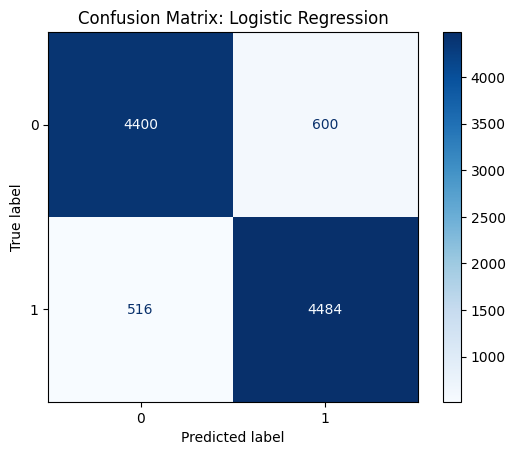

In [48]:
# Confusion Matrix
print("Logistic Regression Confusion Matrix:")
cm_lr = confusion_matrix(y_test, lr_predictions)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=[0, 1])
disp_lr.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix: Logistic Regression")
plt.show()

#### **Logistic Regression Performance**

**Best Parameters**:
- `C = 1`: Moderate regularization to balance underfitting and overfitting.
- `solver = 'lbfgs'`: A stable optimization algorithm for larger datasets.

**Performance Summary**:
- **Accuracy**: The model correctly predicted 89% of the test dataset.
- **Precision**: 
  - Negative (0): 90% of predicted negatives were correct.
  - Positive (1): 88% of predicted positives were correct.
- **Recall**: 
  - Negative (0): 88% of actual negatives were correctly identified.
  - Positive (1): 90% of actual positives were correctly identified.

---

#### **Confusion Matrix Interpretation**

- **True Negatives (TN)**: 4,400 reviews correctly predicted as negative.
- **False Positives (FP)**: 600 reviews misclassified as positive.
- **False Negatives (FN)**: 516 reviews misclassified as negative.
- **True Positives (TP)**: 4,484 reviews correctly predicted as positive.

**Key Observations**:
- **FP (600)**: These errors may occur due to words that overlap in both sentiments.
- **FN (516)**: These errors suggest difficulty in identifying subtle positive tones.

### **5.2 Decision Tree Classifier with Hyperparameter Tuning**

To improve the performance of the Decision Tree model, I applied Grid Search to find the best combination of hyperparameters. This ensures that the model is optimized for the given dataset and doesn’t overfit or underfit.

**What I Did**:
1. **Defined a Parameter Grid**:
   - I tuned the following key hyperparameters:
     - **`max_depth`**: Limits how deep the tree can grow to control overfitting. Values tested: `[10, 20, 30, None]`.
     - **`min_samples_split`**: The minimum number of samples required to split a node. Values tested: `[2, 5, 10]`.
     - **`min_samples_leaf`**: The minimum number of samples required to be at a leaf node. Values tested: `[1, 2, 4]`.

2. **Performed Grid Search**:
   - I used `GridSearchCV` with 3-fold cross-validation (`cv=3`) to evaluate different combinations of hyperparameters. This systematically tests each combination to find the best settings for the model.
   - `scoring='accuracy'` ensures that the evaluation focuses on maximizing the model’s accuracy.

3. **Trained and Tested the Optimized Model**:
   - After finding the best parameters, I trained the Decision Tree model with these optimal settings on the training data.
   - The optimized model was then used to predict sentiment labels on the test set.

In [22]:
param_grid_dt = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search
dt_model = DecisionTreeClassifier(random_state=42)
grid_search_dt = GridSearchCV(dt_model, param_grid=param_grid_dt, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_dt.fit(X_train_vec, y_train)

# Best Parameters and Model Performance
print("Best Parameters for Decision Tree:", grid_search_dt.best_params_)
dt_best_model = grid_search_dt.best_estimator_
dt_predictions = dt_best_model.predict(X_test_vec)
print("Decision Tree Performance:")
print(classification_report(y_test, dt_predictions))

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters for Decision Tree: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2}
Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.79      0.66      0.72      5000
           1       0.71      0.83      0.76      5000

    accuracy                           0.74     10000
   macro avg       0.75      0.74      0.74     10000
weighted avg       0.75      0.74      0.74     10000



Decision Tree Confusion Matrix:


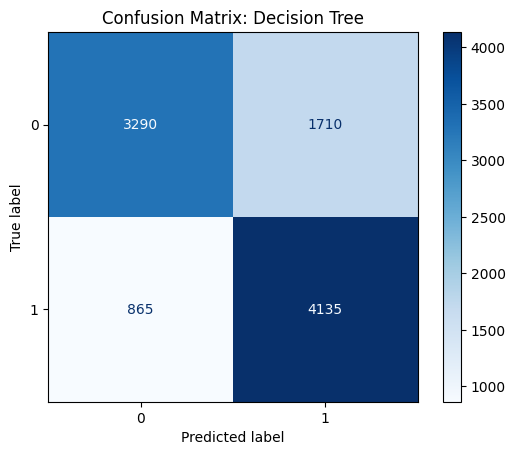

In [23]:
# Confusion Matrix
print("Decision Tree Confusion Matrix:")
cm_dt = confusion_matrix(y_test, dt_predictions)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=[0, 1])
disp_dt.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix: Decision Tree")
plt.show()

#### **Decision Tree Performance**

**Best Parameters for Decision Tree**
- **`max_depth`: 20**  
  Limits the tree depth to prevent overfitting while capturing sufficient data patterns.
- **`min_samples_leaf`: 4**  
  Ensures that each leaf node has at least 4 samples, improving generalization.
- **`min_samples_split`: 2**  
  Requires at least 2 samples to split a node, allowing the tree to grow as needed.

The Decision Tree model's confusion matrix shows how well it classified sentiments:

- **True Positives (TP)**: 4,135 reviews correctly predicted as positive.
- **True Negatives (TN)**: 3,290 reviews correctly predicted as negative.
- **False Positives (FP)**: 1,710 negative reviews misclassified as positive.
- **False Negatives (FN)**: 865 positive reviews misclassified as negative.

---

#### **Performance Summary**:
- **Precision**:
  - Negative (0): 79% of predicted negatives were correct.
  - Positive (1): 71% of predicted positives were correct.
- **Recall**:
  - Negative (0): 66% of actual negatives were correctly identified.
  - Positive (1): 83% of actual positives were correctly identified.
- **Accuracy**: 74% of reviews were classified correctly.

---

#### **Key Observations**:
- The model tends to over-predict positive sentiments, leading to 1,710 false positives.
- Misclassifying 865 positive reviews as negative suggests it struggles with subtle positivity.

### **5.3 Random Forest Classifier with Hyperparameter Tuning**

For the Random Forest model, I used Grid Search to find the best combination of hyperparameters. Random Forest is an ensemble method that builds multiple decision trees and combines their outputs to improve accuracy and reduce overfitting.

**What I Did**:
1. **Defined a Parameter Grid**:
   - `n_estimators`: Number of decision trees in the forest (`50, 100, 200`).
   - `max_depth`: Maximum depth of each tree (`10, 20, None` for no limit).
   - `min_samples_split`: Minimum samples required to split a node (`2, 5`).
   - `min_samples_leaf`: Minimum samples required at a leaf node (`1, 2`).

2. **Performed Grid Search**:
   - Used `GridSearchCV` with 3-fold cross-validation to test all parameter combinations.
   - Scored the model using accuracy to identify the best settings.

3. **Trained the Optimized Model**:
   - Trained the Random Forest with the best hyperparameters found from Grid Search.
   - Evaluated the model using a classification report.

**Expected Outcome**:
The Random Forest model is robust and should provide better generalization than a single Decision Tree. The Grid Search ensures it is tuned for optimal performance.


In [27]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform Grid Search
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
grid_search_rf = GridSearchCV(rf_model, param_grid=param_grid_rf, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_rf.fit(X_train_vec, y_train)

# Best Parameters and Model Performance
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
rf_best_model = grid_search_rf.best_estimator_
rf_predictions = rf_best_model.predict(X_test_vec)
print("Random Forest Performance:")
print(classification_report(y_test, rf_predictions))


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Random Forest Performance:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      5000
           1       0.86      0.85      0.86      5000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



Random Forest Confusion Matrix:


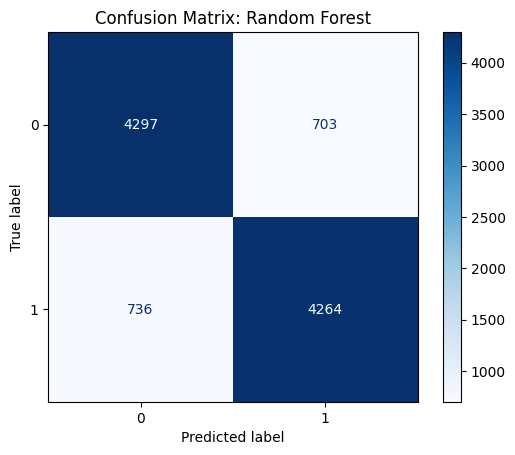

In [28]:
# Confusion Matrix
print("Random Forest Confusion Matrix:")
cm_rf = confusion_matrix(y_test, rf_predictions)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=[0, 1])
disp_rf.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix: Random Forest")
plt.show()

#### **Random Forest Classifier Performance**

**Best Parameters**:
- `max_depth`: None (no depth limit, allowing trees to grow fully).
- `min_samples_leaf`: 1 (minimum one sample per leaf node).
- `min_samples_split`: 5 (minimum samples required to split a node).
- `n_estimators`: 200 (the model builds 200 trees for predictions).

---

#### **Performance Summary**:
- **Accuracy**: The model correctly classified 86% of the test dataset.
- **Precision**:
  - Negative (0): 85% of predicted negatives were correct.
  - Positive (1): 86% of predicted positives were correct.
- **Recall**:
  - Negative (0): 86% of actual negatives were correctly identified.
  - Positive (1): 85% of actual positives were correctly identified.
- **F1-Score**: 0.86 for both positive and negative sentiments.

---

#### **Confusion Matrix Insights**:
- **True Negatives (TN)**: 4,297 reviews correctly predicted as negative.
- **True Positives (TP)**: 4,264 reviews correctly predicted as positive.
- **False Positives (FP)**: 703 negative reviews misclassified as positive.
- **False Negatives (FN)**: 736 positive reviews misclassified as negative.

---

#### **Key Observations**:
- The Random Forest model has a good balance between precision and recall.
- False Positives (703): Some negative reviews were incorrectly classified as positive.
- False Negatives (736): Some positive reviews were incorrectly classified as negative.

### **5.4 LSTM Model Implementation**

Long Short-Term Memory (LSTM) is a type of recurrent neural network (RNN) designed to handle sequential data. It captures long-term dependencies, making it ideal for sentiment analysis where the order of words matters.

---

**Steps**:
1. **Tokenization and Padding**:
   - Tokenized the text data into sequences of integers.
   - Padded sequences to ensure consistent input length of 400 tokens.

2. **LSTM Model Architecture**:
   - **Embedding Layer**: Converts tokenized words into dense vector representations of size 200.
   - **LSTM Layer**: Contains 128 units with dropout (`0.3`) for regularization.
   - **Dense Layer**: A fully connected layer with 64 neurons and ReLU activation.
   - **Output Layer**: A single neuron with sigmoid activation for binary classification (positive or negative sentiment).

3. **Training Configuration**:
   - Optimizer: Adam with a learning rate of `0.0005`.
   - Loss Function: Binary Crossentropy for binary classification.
   - Early Stopping: Stops training when validation loss doesn’t improve for 2 consecutive epochs.

4. **Evaluation**:
   - Tested the model on the test set after training.
   - Metrics like precision, recall, F1-score, and accuracy were computed to evaluate the model's performance.

---

**Why LSTM?**
- LSTM can capture the sequential dependencies and context in text data, which is critical for sentiment classification.
- The added dropout layers prevent overfitting, improving the model's generalization to unseen data.

**Expected Outcome**:
The LSTM model should outperform traditional machine learning models (e.g., Logistic Regression, Decision Tree) due to its ability to process sequential information effectively.

In [29]:
# Tokenization and Padding
tokenizer = Tokenizer(num_words=4000)
tokenizer.fit_on_texts(train_data['review'])

X_train_seq = pad_sequences(tokenizer.texts_to_sequences(train_data['review']), maxlen=400)  # Tuned max length
X_val_seq = pad_sequences(tokenizer.texts_to_sequences(val_data['review']), maxlen=400)
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(test_data['review']), maxlen=400)

# LSTM Model
lstm_model = Sequential([
    Embedding(4000, 200, input_length=250),
    LSTM(128, dropout=0.3, recurrent_dropout=0.3),  # Added dropout for regularization
    Dense(64, activation='relu'),  # Added Dense layer
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
lstm_model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
lstm_model.fit(X_train_seq, y_train, epochs=10, batch_size=64, validation_data=(X_val_seq, y_val), callbacks=[early_stopping])

# Evaluate LSTM
lstm_predictions = (lstm_model.predict(X_test_seq) > 0.5).astype(int)

print("LSTM Performance:")
print(classification_report(y_test, lstm_predictions))


Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 109s 213ms/step - accuracy: 0.7205 - loss: 0.5302 - val_accuracy: 0.8611 - val_loss: 0.3196
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 111s 223ms/step - accuracy: 0.8751 - loss: 0.3105 - val_accuracy: 0.8704 - val_loss: 0.3034
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 110s 220ms/step - accuracy: 0.8922 - loss: 0.2775 - val_accuracy: 0.8652 - val_loss: 0.3022
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 112s 225ms/step - accuracy: 0.9042 - loss: 0.2509 - val_accuracy: 0.8705 - val_loss: 0.3006
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 113s 226ms/step - accuracy: 0.9031 - loss: 0.2526 - val_accuracy: 0.8710 - val_loss: 0.3042
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 115s 231ms/step - accuracy: 0.9153 - loss: 0.2210 - val_accuracy: 0.8690 - val_loss: 0.3252
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 52ms/step
LSTM Performance:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      5000
           1       0.88      0.88     

LSTM Confusion Matrix:


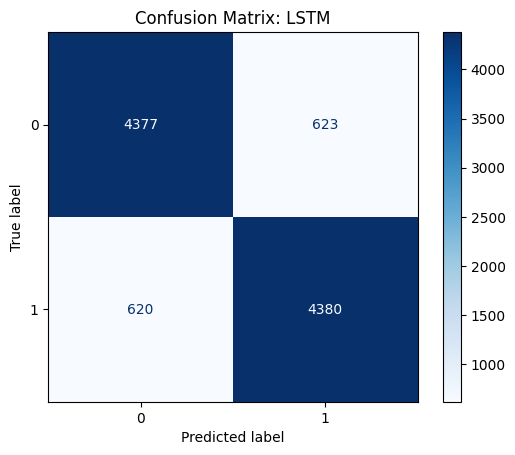

In [30]:
# Confusion Matrix
print("LSTM Confusion Matrix:")
cm_lstm = confusion_matrix(y_test, lstm_predictions)
disp_lstm = ConfusionMatrixDisplay(confusion_matrix=cm_lstm, display_labels=[0, 1])
disp_lstm.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix: LSTM")
plt.show()

#### **LSTM Model Performance**

**Training Results**:
- The LSTM model was trained for up to 10 epochs with early stopping to prevent overfitting.
- The best validation accuracy achieved was **87.10%**, with a corresponding validation loss of **0.3042**.

**Test Set Performance**:
- **Accuracy**: 88% of test samples were correctly classified.
- **Precision**:
  - Negative (0): 88% of predicted negatives were correct.
  - Positive (1): 88% of predicted positives were correct.
- **Recall**:
  - Negative (0): 88% of actual negatives were correctly identified.
  - Positive (1): 88% of actual positives were correctly identified.
- **F1-Score**: Balanced at **0.88** for both positive and negative sentiments.

**Confusion Matrix Insights**:
- **True Positives (TP)**: 4,380 reviews correctly classified as positive.
- **True Negatives (TN)**: 4,377 reviews correctly classified as negative.
- **False Positives (FP)**: 623 negative reviews misclassified as positive.
- **False Negatives (FN)**: 620 positive reviews misclassified as negative.

**Key Observations**:
- The model misclassified 1,243 reviews in total, evenly split between false positives and false negatives.
- The balanced precision and recall indicate that the model handles positive and negative sentiments equally well.
- The sequential understanding of LSTM helps capture context, but further improvements may reduce FP and FN.

### **5.5 Bidirectional LSTM**

The Bidirectional LSTM improves upon the standard LSTM by processing input sequences in both forward and backward directions, capturing context from both past and future words.

**Key Improvements Over Normal LSTM**:
1. **Directionality**:
   - Normal LSTM: Processes sequences only in the forward direction.
   - Bidirectional LSTM: Processes sequences in both forward and backward directions, enriching context understanding.

2. **Regularization**:
   - Increased dropout and recurrent dropout (0.4 vs. 0.3 in normal LSTM).
   - Added L2 regularization to reduce overfitting.

3. **Learning Rate Optimization**:
   - Introduced a learning rate scheduler to dynamically adjust the learning rate based on validation loss.

4. **Training Configuration**:
   - Larger batch size (128 vs. 64) for faster training.
   - Increased embedding size (200 vs. 128) for better feature representation.

**Why Bidirectional LSTM?**
By processing text in both directions and incorporating stronger regularization, the Bidirectional LSTM is better equipped to capture relationships in text and generalize well to unseen data.


In [34]:
# Tokenization and Padding
tokenizer = Tokenizer(num_words=4000)
tokenizer.fit_on_texts(train_data['review'])

X_train_seq = pad_sequences(tokenizer.texts_to_sequences(train_data['review']), maxlen=400)  # Increased maxlen
X_val_seq = pad_sequences(tokenizer.texts_to_sequences(val_data['review']), maxlen=400)
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(test_data['review']), maxlen=400)

# LSTM Model with Improvements
bilstm_model = Sequential([
    Embedding(4000, 200, input_length=400),  # Adjusted embedding size
    Bidirectional(LSTM(128, dropout=0.4, recurrent_dropout=0.4, kernel_regularizer=l2(0.01))),  # Added Bidirectional LSTM
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),  # Added regularization
    Dropout(0.5),  # Increased dropout
    Dense(1, activation='sigmoid')
])

# Compile Model
bilstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)

# Train Model
bilstm_model.fit(
    X_train_seq, y_train,
    epochs=15, batch_size=128,  # Adjusted batch size and epochs
    validation_data=(X_val_seq, y_val),
    callbacks=[early_stopping, lr_scheduler]
)

# Evaluate Model
bilstm_predictions = (bilstm_model.predict(X_test_seq) > 0.5).astype(int)

print("LSTM Performance:")
print(classification_report(y_test, bilstm_predictions))

Epoch 1/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 428s 2s/step - accuracy: 0.6388 - loss: 2.7789 - val_accuracy: 0.8319 - val_loss: 0.4665 - learning_rate: 0.0010
Epoch 2/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 463s 2s/step - accuracy: 0.8503 - loss: 0.4416 - val_accuracy: 0.8641 - val_loss: 0.3828 - learning_rate: 0.0010
Epoch 3/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 434s 2s/step - accuracy: 0.8709 - loss: 0.3918 - val_accuracy: 0.8629 - val_loss: 0.3719 - learning_rate: 0.0010
Epoch 4/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 433s 2s/step - accuracy: 0.8738 - loss: 0.3773 - val_accuracy: 0.8641 - val_loss: 0.3721 - learning_rate: 0.0010
Epoch 5/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 439s 2s/step - accuracy: 0.8832 - loss: 0.3519 - val_accuracy: 0.8609 - val_loss: 0.3570 - learning_rate: 0.0010
Epoch 6/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 422s 2s/step - accuracy: 0.8882 - loss: 0.3345 - val_accuracy: 0.8599 - val_loss: 0.3805 - learning_rate: 0.0010
Epoch 7/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 414s 2s/step - accuracy: 0.8894 - loss: 0.

LSTM Confusion Matrix:


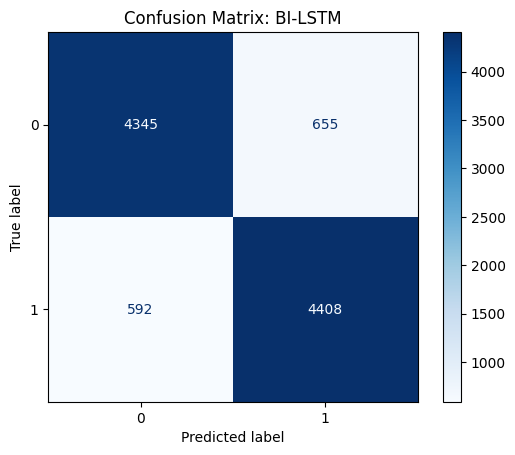

In [57]:
# Confusion Matrix
print("LSTM Confusion Matrix:")
cm_bilstm = confusion_matrix(y_test, bilstm_predictions)
disp_bilstm = ConfusionMatrixDisplay(confusion_matrix=cm_bilstm, display_labels=[0, 1])
disp_bilstm.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix: BI-LSTM")
plt.show()

#### **Bidirectional LSTM Performance**

**Training Results**:
- Best validation accuracy: **86.90%** with validation loss **0.3456** (7th epoch).
- Learning rate dynamically reduced during training for better convergence.

**Test Set Performance**:
- **Accuracy**: 88%
- **Precision**: Negative (0): 88%, Positive (1): 87%
- **Recall**: Negative (0): 87%, Positive (1): 88%
- **F1-Score**: Balanced at 0.88.

**Confusion Matrix**:
- **True Positives (TP)**: 4,408
- **True Negatives (TN)**: 4,345
- **False Positives (FP)**: 655
- **False Negatives (FN)**: 592

**Key Observations**:
- Captures richer context with bidirectional processing.
- Balanced performance for both sentiment classes.
- Misclassification (FP + FN = 1,247) suggests room for improvement.

### **Step 6: Model Accuracy Comparison**

This section compares the accuracy of different models used for sentiment classification:
1. Logistic Regression
2. Decision Tree
3. Random Forest
4. LSTM
5. Bidirectional LSTM

**Visualization**:
- A bar chart is used to display the accuracy scores for all models.
- This helps identify which model performs best in terms of accuracy.

**Purpose**:
- To evaluate the effectiveness of each model and highlight improvements as we progress from simpler models to more advanced architectures.


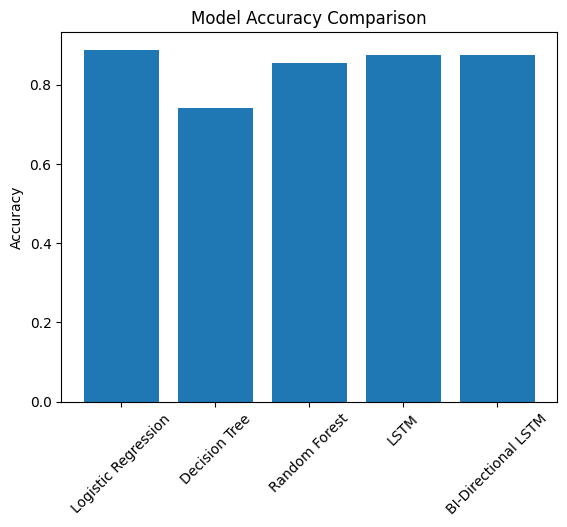

In [50]:
# Collect Accuracy Scores
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'LSTM', 'BI-Directional LSTM']
accuracies = [
    accuracy_score(y_test, lr_predictions),
    accuracy_score(y_test, dt_predictions),
    accuracy_score(y_test, rf_predictions),
    accuracy_score(y_test, lstm_predictions),
    accuracy_score(y_test, bilstm_predictions)
]

# Plot Accuracy Comparison
plt.bar(models, accuracies)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()


### **Step 7: Testing the Models with a Sample Input**

I tested the models with the following sentence:  
**"The plot of the movie is great"**

---

**Steps Taken**:
1. **Cleaned the Input**:
   - Removed any unnecessary characters like punctuation or HTML tags.
   - Converted the text to lowercase.
   - Removed common words (stopwords) that don’t add much meaning.

2. **Prepared the Input**:
   - For Logistic Regression, Decision Tree, and Random Forest, the sentence was converted into a vector using the TF-IDF vectorizer.
   - For LSTM and Bidirectional LSTM, the sentence was tokenized and padded to the required input length.

3. **Made Predictions**:
   - Each model predicted whether the sentence had a positive or negative sentiment:
     - `0`: Negative sentiment.
     - `1`: Positive sentiment.

---

**Expected Result**:
The sentence *"The plot of the movie is great"* is expected to be classified as **positive sentiment** (`1`) by all models because of its clear positive tone.

**Why This is Useful**:
This example shows how the trained models can be used to classify new sentences and demonstrates their ability to understand sentiment in real-world inputs.


In [54]:
# Example input sentence
input_sentence = "The plot of the movie is great"

# Preprocess the input sentence (same as the cleaning process used for training data)
def preprocess_input(sentence):
    sentence = re.sub('<.*?>', '', sentence)  # Remove HTML tags
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)  # Remove special characters
    sentence = sentence.lower()  # Convert to lowercase
    words = [word for word in sentence.split() if word not in stop_words]  # Remove stopwords
    return ' '.join(words)

# Preprocess the input
cleaned_sentence = preprocess_input(input_sentence)

# Vectorize the input for machine learning models
input_vectorized = vectorizer.transform([cleaned_sentence]).toarray()

# Tokenize and pad the input for LSTM models
input_tokenized = tokenizer.texts_to_sequences([cleaned_sentence])
input_padded = pad_sequences(input_tokenized, maxlen=400)

# Predict with each model
print("Logistic Regression Prediction:", lr_best_model.predict(input_vectorized)[0])
print("Decision Tree Prediction:", dt_best_model.predict(input_vectorized)[0])
print("Random Forest Prediction:", rf_best_model.predict(input_vectorized)[0])
print("LSTM Prediction:", (lstm_model.predict(input_padded) > 0.5).astype(int)[0][0])
print("Bidirectional LSTM Prediction:", (bilstm_model.predict(input_padded) > 0.5).astype(int)[0][0])


Logistic Regression Prediction: 1
Decision Tree Prediction: 1
Random Forest Prediction: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
LSTM Prediction: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Bidirectional LSTM Prediction: 1


It is clear from the above output that all the models predicted the out put as 1 which means the positive sentiment

### **Step 8: Scope for Further Development**

While the current implementation with LSTM and Bidirectional LSTM shows comparable performance to simpler models like Logistic Regression, there are several areas for improvement and expansion in this project:

1. **Limited Dataset Size**:  
   The dataset used for training is relatively small for deep learning models like LSTM or Bidirectional LSTM to reach their full potential. Using a larger dataset with more diverse examples could help the models better capture complex patterns in text.

2. **Domain-Specific Nuances**:  
   The current models may struggle with understanding domain-specific language, slang, or subtle sentiments. Incorporating domain-specific pre-trained embeddings or fine-tuning on domain-relevant datasets could improve the performance.

3. **Transformer-Based Models**:  
   Using transformer models like BERT, DistilBERT, or models from Hugging Face could significantly enhance the project. These models tokenize text bidirectionally, understanding the context from both past and future words, leading to a deeper comprehension of the text.

4. **Incorporate Semantic Understanding**:  
   Beyond word-level processing, leveraging sentence-level semantic understanding (e.g., using Sentence-BERT) could improve sentiment analysis for complex sentences and reviews with mixed sentiments.

5. **Fine-Tuning Pre-Trained Models**:  
   Transfer learning with pre-trained transformer models could allow for better performance on smaller datasets while reducing training time.

6. **Multi-Class Sentiment Analysis**:  
   Expand the current binary classification (positive/negative) to include neutral or other sentiment classes for a more nuanced analysis.

---

**Future Goals**:
These steps aim to build a more robust and generalizable model, capable of handling real-world challenges in sentiment analysis while achieving higher accuracy and context-aware predictions.


### **Step 9: Conclusion**


This project demonstrates the application of various machine learning and deep learning models for sentiment analysis using the IMDB movie reviews dataset. Models like Logistic Regression, Decision Tree, Random Forest, LSTM, and Bidirectional LSTM were implemented, fine-tuned, and evaluated.

While simpler models such as Logistic Regression and Random Forest provided competitive performance, LSTM and Bidirectional LSTM demonstrated their potential in capturing the sequential nature of text data. However, the performance of deep learning models was limited by factors such as dataset size and the lack of domain-specific understanding.

Through this analysis, we identified the strengths and limitations of each approach. The findings highlight the importance of dataset quality, advanced feature representation, and context-aware modeling in achieving superior results.

This project lays a foundation for further advancements, including leveraging transformer-based models like BERT for better context comprehension and exploring transfer learning techniques. By addressing current limitations, future iterations of this work can achieve improved accuracy and applicability in real-world sentiment analysis tasks.
